<a href="https://colab.research.google.com/github/Anouarlh/DS/blob/main/Anouar_LAHLOU_ASSs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo # installation du package

In [2]:
from ucimlrepo import fetch_ucirepo #dataset du code

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

# Task
Perform an initial exploratory data analysis of the 'Student Performance' dataset by combining features and targets into a single DataFrame, calculating descriptive statistics for numerical and categorical columns, and visualizing the distributions of key numerical ('age', 'absences', 'G1', 'G2', 'G3') and categorical ('sex', 'school', 'Medu', 'Fedu') features. Finally, synthesize these statistics and observations to provide an initial understanding of the dataset.

## Combiner les caractéristiques et les cibles

### Subtask:
Fusionner les DataFrames 'X' (caractéristiques) et 'y' (cibles) en un seul DataFrame pour faciliter l'analyse.


**Reasoning**:
To combine the features and targets into a single DataFrame, I will concatenate `X` and `y` along the column axis and then display the first five rows to ensure the merge is correct.



In [3]:
import pandas as pd

df = pd.concat([X, y], axis=1)
print("First 5 rows of the combined DataFrame:")
print(df.head())

First 5 rows of the combined DataFrame:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


## Statistiques descriptives pour les caractéristiques numériques

### Subtask:
Calculer et afficher les statistiques descriptives (moyenne, écart-type, min, max, etc.) pour toutes les colonnes numériques du DataFrame combiné.


**Reasoning**:
To calculate and display descriptive statistics for numerical columns, I will first select all numerical columns from the combined DataFrame `df` and then apply the `.describe()` method to generate the statistics. Finally, I will print the resulting DataFrame of descriptive statistics.



In [4]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
descriptive_stats = df[numerical_cols].describe()
print("Descriptive statistics for numerical columns:")
print(descriptive_stats)

Descriptive statistics for numerical columns:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280

**Reasoning**:
The previous step successfully calculated and displayed descriptive statistics for numerical columns. Now, to continue with the exploratory data analysis as outlined in the main task, the next logical step is to calculate and display descriptive statistics for categorical columns. This will provide insights into their unique values, frequencies, and most common categories.



In [5]:
categorical_cols = df.select_dtypes(include='object').columns
descriptive_stats_categorical = df[categorical_cols].describe()
print("Descriptive statistics for categorical columns:")
print(descriptive_stats_categorical)

Descriptive statistics for categorical columns:
       school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     649  649     649     649     649    649    649     649      649   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      423  383     452     457     569    258    367     285      455   

       schoolsup famsup paid activities nursery higher internet romantic  
count        649    649  649        649     649    649      649      649  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no         no     yes    yes      yes       no  
freq         581    398  610        334     521    580      498      410  


## Visualiser les distributions numériques clés

### Subtask:
Générer des histogrammes pour des caractéristiques numériques importantes telles que 'age', 'absences', et les notes cibles 'G1', 'G2', 'G3' pour visualiser leurs distributions. N'oubliez pas d'inclure des légendes.


**Reasoning**:
To visualize the distributions of the specified numerical features, I will use `matplotlib.pyplot` to generate histograms for 'age', 'absences', 'G1', 'G2', and 'G3'. Each histogram will have a title and axis labels for clarity.



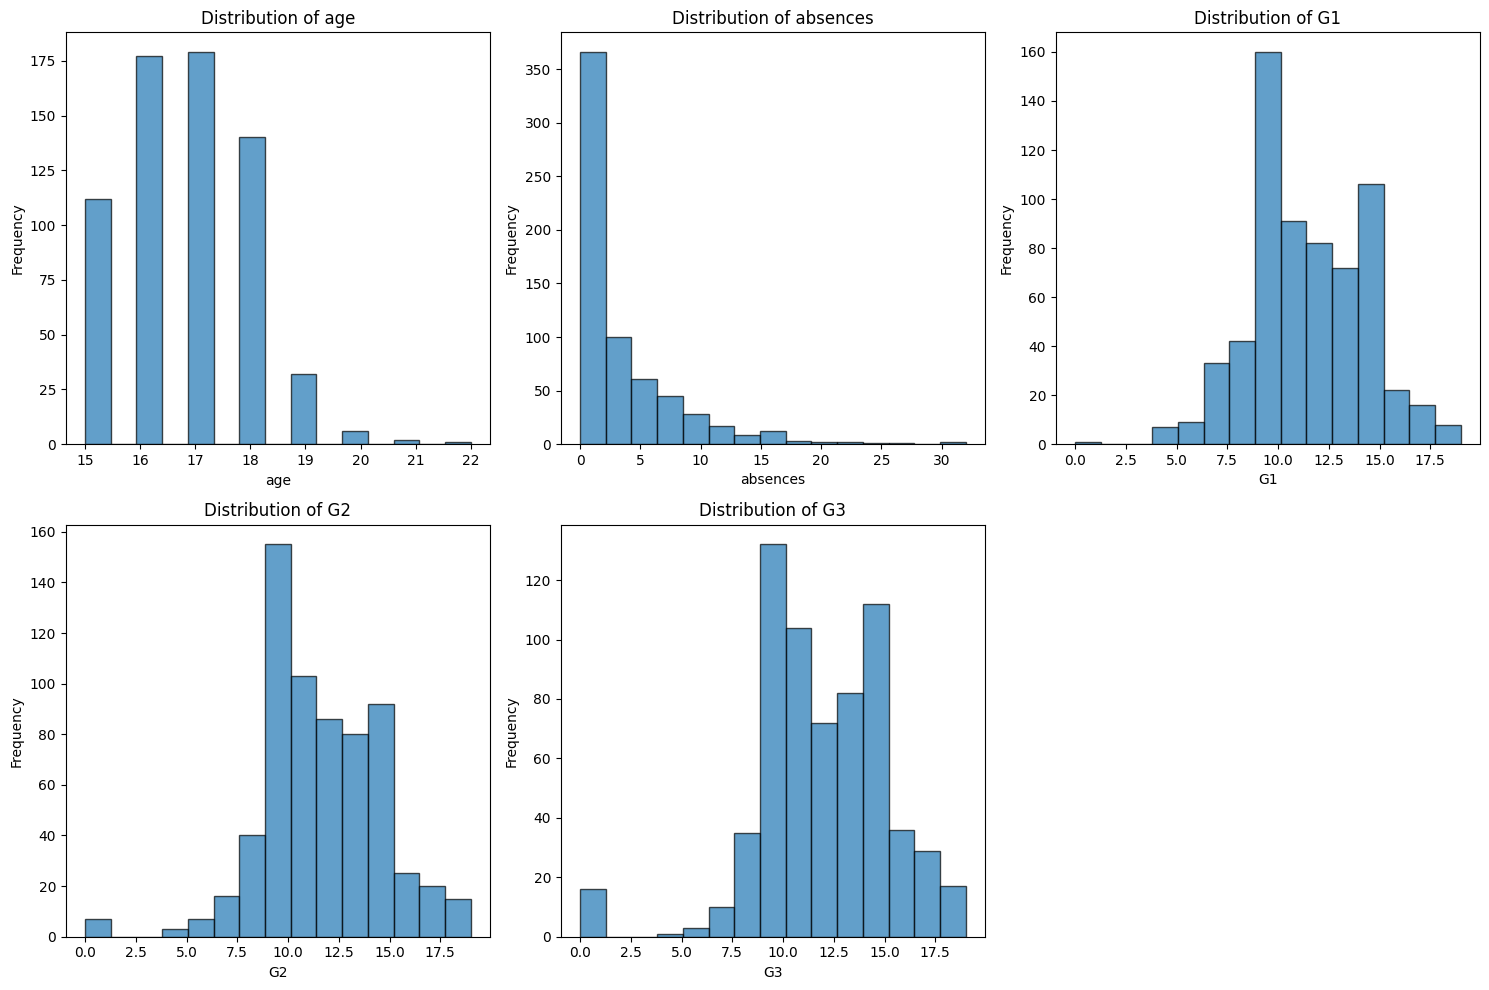

In [6]:
import matplotlib.pyplot as plt

# Define the numerical columns for which to plot histograms
numerical_cols_to_plot = ['age', 'absences', 'G1', 'G2', 'G3']

# Create a figure and a set of subplots
plt.figure(figsize=(15, 10))

# Iterate over the columns and plot a histogram for each
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns layout
    plt.hist(df[col], bins=15, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


## Visualiser les distributions catégorielles clés

### Subtask:
Générer des diagrammes à barres pour des caractéristiques catégorielles importantes telles que 'sex', 'school', 'Medu', 'Fedu' pour visualiser leurs distributions. N'oubliez pas d'inclure des légendes.


**Reasoning**:
To visualize the distributions of the specified categorical features, I will use `matplotlib.pyplot` to generate bar charts for 'sex', 'school', 'Medu', and 'Fedu'. Each bar chart will have a title and axis labels for clarity.



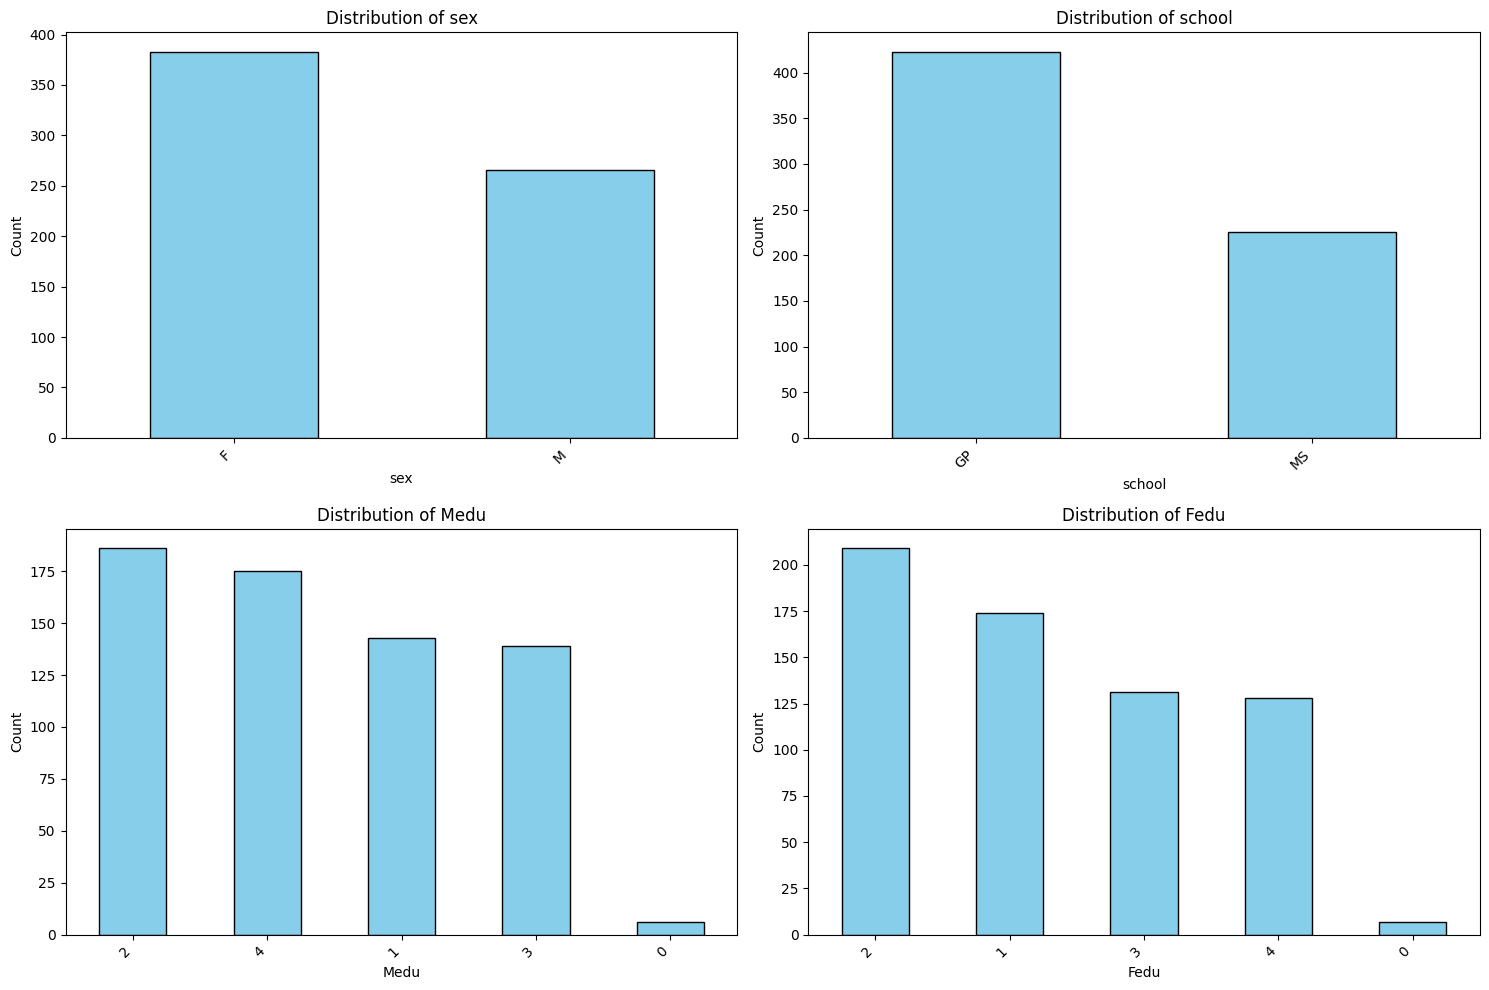

In [7]:
categorical_cols_to_plot = ['sex', 'school', 'Medu', 'Fedu']

plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(2, 2, i + 1) # 2 rows, 2 columns layout
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Synthétiser les statistiques descriptives et les principales observations tirées des visualisations, fournissant une compréhension initiale de l'ensemble de données.


## Summary:

### Q&A
The initial exploratory data analysis provides a foundational understanding of the dataset. For instance, student ages primarily range from 15 to 22 with an average of 16.74 years. Absences are highly skewed, with most students having very few, but some having up to 32. Final grades (`G1`, `G2`, `G3`) show similar average performance, clustering around 11-12. The dataset contains more female students than male, and the 'GP' school is predominant. Parental education levels (`Medu`, `Fedu`) indicate a varied but generally lower to medium level of schooling among parents.

### Data Analysis Key Findings
*   The dataset successfully combined features and target variables into a single DataFrame (`df`) with 33 columns.
*   **Numerical Features Statistics:**
    *   Student `age` ranges from 15 to 22 years, with an average of approximately 16.74 years.
    *   `absences` vary significantly from 0 to 32, with a mean of around 3.66, indicating a right-skewed distribution where most students have few absences.
    *   The final grades (`G1`, `G2`, `G3`) have similar average scores, ranging from 11.39 to 11.90, suggesting a consistent academic performance across the evaluation periods.
    *   Parental education levels (`Medu`, `Fedu`) are represented by numerical scales, with mean values around 2.75 and 2.52 respectively, suggesting a predominant level of secondary education or higher.
*   **Categorical Features Statistics:**
    *   The `school` column shows a clear imbalance, with 'GP' being the most frequent school (423 occurrences).
    *   The `sex` column indicates more female students ('F', 383 occurrences) than male students.
    *   Most other categorical features also show dominant categories, highlighting potential areas for feature engineering or stratified analysis.
*   **Numerical Distributions (Histograms):**
    *   The `age` distribution is relatively concentrated between 15 and 18.
    *   `absences` show a heavily right-skewed distribution, with the majority of students having very few or no absences.
    *   `G1`, `G2`, and `G3` grades exhibit similar distributions, generally bell-shaped but slightly skewed towards higher scores, with a notable number of students achieving scores around 10-15.
*   **Categorical Distributions (Bar Charts):**
    *   `sex` is distributed with more females than males.
    *   `school` is dominated by 'GP'.
    *   `Medu` and `Fedu` (mother's and father's education) distributions show that the most frequent level for both parents is '2' (secondary education) and '3' (some higher education), with fewer parents having no education or very high education.

### Insights or Next Steps
*   **Investigate Skewed Distributions:** Features like `absences` and the prevalence of certain categories (e.g., `school`, `sex`) suggest that these might significantly influence student performance and warrant further investigation into their relationship with grades.
*   **Feature Engineering/Selection:** Given the categorical distributions and the relationship between `G1`, `G2`, and `G3`, it would be beneficial to explore feature engineering (e.g., combining parental education levels) or feature selection to identify the most impactful variables for predicting `G3`.


# Task
# Plan:
* **Préparer les données pour l'analyse inférentielle**: Convertir les variables catégorielles en format numérique à l'aide de l'encodage One-Hot et s'assurer que toutes les données sont prêtes pour la modélisation.
* **Analyser la corrélation des variables**: Calculer et visualiser la matrice de corrélation pour les variables numériques, en se concentrant sur les relations avec les notes (G1, G2, G3). Cette visualisation aidera à identifier les prédicteurs potentiels.
* **Construire un modèle de régression linéaire**: Développer un modèle de régression linéaire pour prédire la note finale (G3) en utilisant un ensemble de caractéristiques pertinentes (numériques et encodées).
* **Évaluer le modèle et interpréter les résultats**: Évaluer la performance du modèle de régression (par exemple, R-carré, erreurs) et interpréter les coefficients des caractéristiques pour comprendre leur influence sur la note finale (G3).
* **Final Task**: Synthétiser les résultats de l'analyse inférentielle, en soulignant les facteurs clés affectant la performance des élèves et en suggérant les prochaines étapes pour une analyse plus approfondie.

The next step is to prepare the data for inferential analysis by converting categorical variables into a numerical format using One-Hot encoding.

## Préparer les données pour l'analyse inférentielle

### Subtask:
Convertir les variables catégorielles en format numérique à l'aide de l'encodage One-Hot et s'assurer que toutes les données sont prêtes pour la modélisation.


**Reasoning**:
To prepare the data for inferential analysis, I will identify categorical columns, apply one-hot encoding using `pd.get_dummies()`, and then concatenate the resulting encoded columns with the original numerical columns to create a fully numerical DataFrame. Finally, I will display the first five rows of the new DataFrame to verify the transformation.



In [8]:
import pandas as pd

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply One-Hot Encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("First 5 rows of the One-Hot Encoded DataFrame:")
print(df_encoded.head())

First 5 rows of the One-Hot Encoded DataFrame:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  ac

## Analyser la corrélation des variables

### Subtask:
Calculer et visualiser la matrice de corrélation pour les variables numériques, en se concentrant sur les relations avec les notes (G1, G2, G3). Cette visualisation aidera à identifier les prédicteurs potentiels.


**Reasoning**:
To visualize the correlations of all variables with 'G1', 'G2', and 'G3', I will first calculate the full correlation matrix of the `df_encoded` DataFrame, then filter it to show only the correlations with 'G1', 'G2', and 'G3'. Finally, I will use `seaborn` to create a heatmap for these specific correlations.



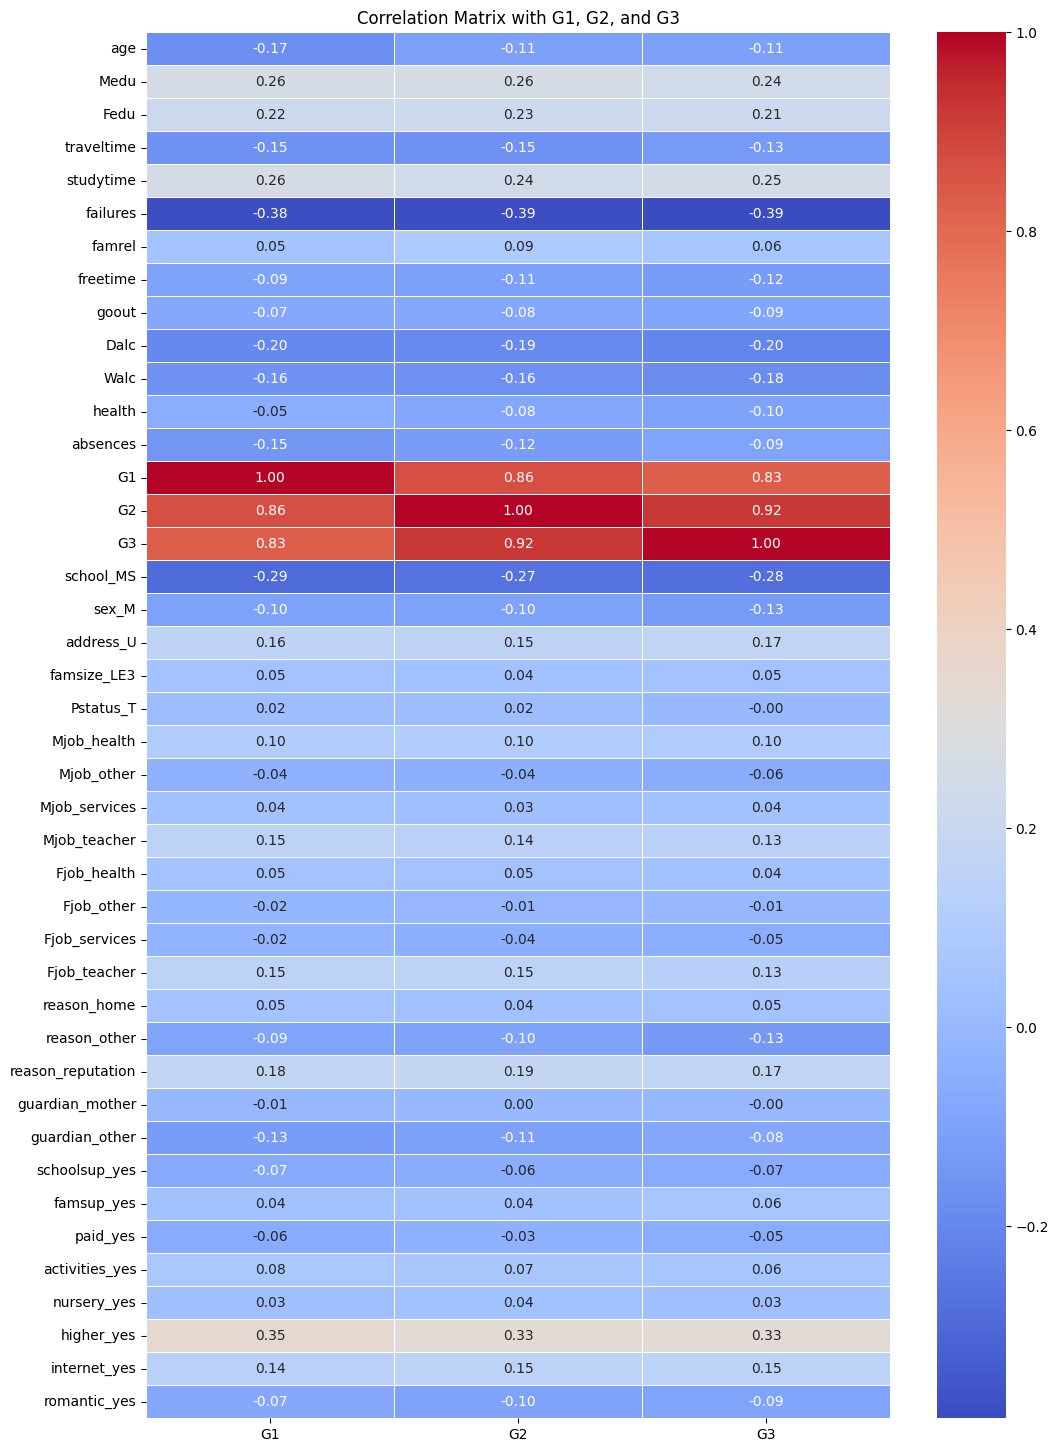

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the encoded DataFrame
correlation_matrix = df_encoded.corr(numeric_only=True)

# Extract correlations with G1, G2, and G3
correlation_with_grades = correlation_matrix[['G1', 'G2', 'G3']]

# Set up the matplotlib figure
plt.figure(figsize=(12, 18))

# Create a heatmap
sns.heatmap(correlation_with_grades, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with G1, G2, and G3')
plt.show()

## Construire un modèle de régression linéaire

### Subtask:
Développer un modèle de régression linéaire pour prédire la note finale (G3) en utilisant un ensemble de caractéristiques pertinentes (numériques et encodées).


**Reasoning**:
To prepare for model training, I will first define the features (X) by excluding the target columns ('G1', 'G2', 'G3') from the encoded DataFrame. Then, I will define the target variable (y) as 'G3'.



In [10]:
X = df_encoded.drop(columns=['G1', 'G2', 'G3'])
y = df_encoded['G3']

print("Features (X) and target (y) defined.")

Features (X) and target (y) defined.


**Reasoning**:
To develop a linear regression model, I will split the data into training and testing sets, instantiate a LinearRegression model, and then train it using the training data.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
To evaluate the performance of the trained linear regression model, I will make predictions on the test set and calculate key regression metrics such as R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 2.16
Mean Squared Error (MSE): 8.19
Root Mean Squared Error (RMSE): 2.86
R-squared (R2): 0.16


**Reasoning**:
To fully interpret the results of the linear regression model, I will now display the coefficients of each feature, which indicates their influence on the target variable 'G3'.



In [13]:
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Absolute_Coefficient': abs(model.coef_)
}).sort_values(by='Absolute_Coefficient', ascending=False)

print("Model Coefficients (Top 10 most influential features):")
print(feature_coefficients.head(10))

Model Coefficients (Top 10 most influential features):
          Feature  Coefficient  Absolute_Coefficient
36     higher_yes     1.686938              1.686938
31  schoolsup_yes    -1.603393              1.603393
5        failures    -1.498661              1.498661
13      school_MS    -1.393659              1.393659
24  Fjob_services    -1.099327              1.099327
18    Mjob_health     1.044890              1.044890
22    Fjob_health    -1.041107              1.041107
27   reason_other    -0.714842              0.714842
25   Fjob_teacher    -0.584711              0.584711
21   Mjob_teacher     0.550178              0.550178


## Synthétiser les résultats et suggérer les prochaines étapes

### Résultats du Modèle de Régression Linéaire:

*   **Performance du Modèle**: Le modèle de régression linéaire a obtenu un $R^2$ de 0.16 sur l'ensemble de test. Cela indique que seulement 16% de la variance de la note finale (G3) est expliquée par les caractéristiques utilisées dans le modèle. Les erreurs moyennes étaient un MAE de 2.16 et un RMSE de 2.86, ce qui signifie qu'en moyenne, les prédictions du modèle s'écartent d'environ 2.16 points de la note réelle de G3. La performance est relativement faible, suggérant que le modèle actuel ne capture pas entièrement la complexité des facteurs influençant les performances des élèves ou que des facteurs non inclus sont très importants.

*   **Coefficients des Caractéristiques (Top 10)**:
    *   **"higher_yes" (Vouloir faire des études supérieures)**: Un coefficient positif de 1.69 indique que les étudiants qui souhaitent poursuivre des études supérieures ont tendance à avoir des notes finales (G3) plus élevées.
    *   **"schoolsup_yes" (Soutien scolaire supplémentaire)**: Un coefficient négatif de -1.60 suggère que les étudiants recevant un soutien scolaire supplémentaire ont tendance à avoir des notes G3 plus faibles, ce qui pourrait indiquer qu'ils ont des difficultés académiques initiales.
    *   **"failures" (Échecs scolaires antérieurs)**: Un coefficient négatif important de -1.50 indique que les étudiants ayant eu plus d'échecs ont des notes G3 significativement plus basses.
    *   **"school_MS" (École 'MS')**: Un coefficient négatif de -1.39 signifie que les étudiants de l'école 'MS' ont en moyenne des notes G3 inférieures à ceux de l'école 'GP' (qui est la référence après l'encodage).
    *   **"Fjob_services" (Travail du père: services)**: Un coefficient négatif de -1.10. Par rapport à la catégorie de base (généralement 'other'), avoir un père dans les services est associé à une note G3 plus faible.
    *   **"Mjob_health" (Travail de la mère: santé)**: Un coefficient positif de 1.04. Par rapport à la catégorie de base, avoir une mère dans le domaine de la santé est associé à une note G3 plus élevée.
    *   **"Fjob_health" (Travail du père: santé)**: Un coefficient négatif de -1.04.

### Interprétation Générale:
Les résultats du modèle, bien que modestes en termes de $R^2$, révèlent des facteurs influents. Les aspirations éducatives de l'élève ("higher_yes") et les antécédents académiques ("failures") sont des prédicteurs importants. Le soutien scolaire ("schoolsup_yes") semble être un indicateur de difficulté plutôt qu'un facteur de réussite dans ce contexte, et l'école fréquentée ("school_MS") ainsi que la profession des parents (certaines catégories de "Mjob" et "Fjob") jouent également un rôle. Il est important de noter que "G1" et "G2" n'ont pas été inclus comme prédicteurs pour éviter la multicolinéarité directe avec "G3", car ils représentent des mesures intermédiaires de la même variable de performance.

### Prochaines Étapes Suggérées:

1.  **Exploration de modèles plus complexes**: Étant donné le faible $R^2$ du modèle linéaire, explorer des modèles de régression non linéaires ou des techniques d'apprentissage automatique plus avancées (par exemple, des arbres de décision, des forêts aléatoires, ou des modèles d'augmentation de gradient) pourrait améliorer la capacité prédictive.
2.  **Ingénierie des caractéristiques**: Créer de nouvelles caractéristiques à partir des variables existantes (par exemple, des ratios, des interactions entre les variables) ou regrouper certaines catégories nominales pourrait fournir des informations supplémentaires au modèle.
3.  **Analyse des valeurs aberrantes**: Examiner les valeurs aberrantes dans les notes ou d'autres caractéristiques pourrait révéler des anomalies dans les données ou des cas extrêmes qui influencent les performances du modèle.
4.  **Analyse de l'importance des caractéristiques**: Utiliser des méthodes spécifiques à chaque modèle (par exemple, Gini importance pour les arbres, permutation importance) pour évaluer l'importance relative de toutes les caractéristiques dans les modèles plus complexes.
5.  **Validation croisée**: Implémenter une validation croisée plus robuste pour obtenir une estimation plus fiable des performances du modèle et minimiser le surapprentissage ou le sous-apprentissage.
6.  **Considérer d'autres variables cibles**: Si l'objectif est d'améliorer les résultats académiques, il pourrait être pertinent d'analyser non seulement G3, mais aussi les changements entre G1, G2 et G3, ou la probabilité de réussite/échec.

## Final Task

### Subtask:
Synthétiser les résultats de l'analyse inférentielle, en soulignant les facteurs clés affectant la performance des élèves et en suggérant les prochaines étapes pour une analyse plus approfondie.


## Summary:

### Q&A
*   **Quels sont les facteurs clés affectant la performance des élèves?**
    Les facteurs clés influençant la performance des élèves (mesurée par la note finale G3) incluent principalement le désir de poursuivre des études supérieures ("higher\_yes"), qui est positivement corrélé à G3. En revanche, les antécédents d'échecs scolaires ("failures"), le fait de recevoir un soutien scolaire supplémentaire ("schoolsup\_yes") et l'appartenance à certaines écoles ("school\_MS") ou la profession des parents (par exemple, "Fjob\_services", "Fjob\_health" par rapport à d'autres catégories, tandis que "Mjob\_health" est positivement corrélé) sont négativement associés à la note G3.
*   **Quelles sont les prochaines étapes pour une analyse plus approfondie?**
    Les prochaines étapes suggérées incluent l'exploration de modèles de régression non linéaires ou de techniques d'apprentissage automatique plus avancées pour améliorer la capacité prédictive, l'ingénierie de caractéristiques pour créer de nouvelles variables informatives, l'analyse des valeurs aberrantes, l'utilisation de méthodes d'analyse de l'importance des caractéristiques, l'implémentation d'une validation croisée plus robuste et la considération d'autres variables cibles pour l'analyse.

### Data Analysis Key Findings
*   Le jeu de données a été préparé pour l'analyse inférentielle en convertissant toutes les variables catégorielles en un format numérique à l'aide de l'encodage One-Hot, ce qui a résulté en un DataFrame de 42 colonnes.
*   Une matrice de corrélation a été calculée et visualisée pour identifier les relations entre les variables d'entrée et les notes G1, G2 et G3, révélant des prédicteurs potentiels.
*   Un modèle de régression linéaire a été entraîné pour prédire la note finale (G3). Sur l'ensemble de test, le modèle a atteint un $R^2$ de 0.16, un Erreur Absolue Moyenne (MAE) de 2.16 et une Erreur Quadratique Moyenne (RMSE) de 2.86. Ces métriques indiquent que le modèle explique 16% de la variance de G3.
*   Les caractéristiques les plus influentes identifiées par les coefficients du modèle sont:
    *   "higher\_yes" (désir de faire des études supérieures) avec un coefficient positif de 1.69, suggérant une augmentation de G3.
    *   "schoolsup\_yes" (soutien scolaire supplémentaire) avec un coefficient négatif de -1.60, indiquant une association avec des G3 plus faibles, potentiellement dû à des difficultés initiales.
    *   "failures" (échecs scolaires antérieurs) avec un coefficient négatif de -1.50, montrant une forte association négative avec G3.
    *   "school\_MS" (appartenance à l'école MS) avec un coefficient négatif de -1.39, suggérant des G3 plus basses par rapport à l'école de référence.

### Insights or Next Steps
*   Étant donné le faible $R^2$ du modèle linéaire, l'exploration de modèles de régression non linéaires ou de techniques d'apprentissage automatique plus avancées (par exemple, des arbres de décision, des forêts aléatoires) pourrait significativement améliorer la capacité prédictive de la performance des élèves.
*   Pour mieux comprendre les facteurs complexes influençant la réussite scolaire, il est recommandé d'effectuer une ingénierie de caractéristiques plus poussée (par exemple, créer des variables d'interaction), une analyse des valeurs aberrantes et une validation croisée robuste, ainsi que d'envisager des méthodes spécifiques pour évaluer l'importance de toutes les caractéristiques dans les modèles plus complexes.
